<a href="https://colab.research.google.com/github/COMP4702-UQ/Pracs-notebook/blob/main/PracW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thyroid Dataset Information in this [link](https://www.researchgate.net/publication/325117645_A_Comparative_study_of_machine_learning_algorithms_on_thyroid_disease_prediction).

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Mount google colab to drive to access to the dataset (uncomment only when you use Google Colab + Drive)
# from google.colab import drive
# drive.mount('/content/drive/')

In [69]:
# Load dataset (specify full path like '/content/drive/My Drive/...' when you use Google Colab + Drive)
train_data = pd.read_csv('ann-train.data', delim_whitespace=True, header=None)
test_data = pd.read_csv('ann-test.data', delim_whitespace=True, header=None)

X_train = train_data.iloc[:, :-1]
Y_train = train_data.iloc[:, -1]  

X_test = test_data.iloc[:, :-1]  
Y_test = test_data.iloc[:, -1]  

C:\Users\Krisna\AppData\Local\Temp\ipykernel_1972\3712689262.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv('ann-train.data', delim_whitespace=True, header=None)
C:\Users\Krisna\AppData\Local\Temp\ipykernel_1972\3712689262.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv('ann-test.data', delim_whitespace=True, header=None)


# Q1

Training Loss: 5.0371%
Test Loss: 6.3302%


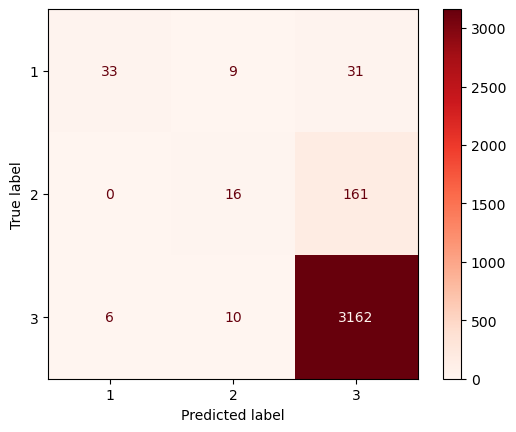

----------------------------
Accuracy: 93.67%


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#TODO: Step 1: Train a k-NN model (choose some reasonable value for k)
k = 5  # Choose a value for k (e.g., 5)
knn_model = KNeighborsClassifier(k)
knn_model.fit(X_train, Y_train)

#TODO: Step 2: Make Predictions
Y_train_pred = knn_model.predict(X_train)
Y_test_pred = knn_model.predict(X_test)


#TODO: Step 3: Evaluate Model
train_loss = 1 - accuracy_score(Y_train, Y_train_pred)
test_loss = 1 - accuracy_score(Y_test, Y_test_pred)

print(f'Training Loss: {100* train_loss:.4f}%')
print(f'Test Loss: {100*test_loss:.4f}%')

conf_matrix = confusion_matrix(Y_test, Y_test_pred)
accuracy = accuracy_score(Y_test, Y_test_pred)

# Step 4: Visualize the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot(cmap='Reds')
plt.show()

print('----------------------------')
print(f"Accuracy: {np.around(accuracy*100, 2)}%")

# Q2

(a)

In [71]:
# TODO: Convert dataset to perform binary classification
# Map class '1' to 0 (normal), classes '2' and '3' to 1 (abnormal)
train_data[21] = train_data[21].apply(lambda x: 0 if x == 1 else 1)
test_data[21] = test_data[21].apply(lambda x: 0 if x == 1 else 1)

# TODO: Split X and y
X_train = train_data.iloc[:, :-1]  # All columns except the last one
y_train = train_data.iloc[:, -1]   # Last column (target)

X_test = test_data.iloc[:, :-1]    # All columns except the last one
y_test = test_data.iloc[:, -1]     # Last column (target)


(b)

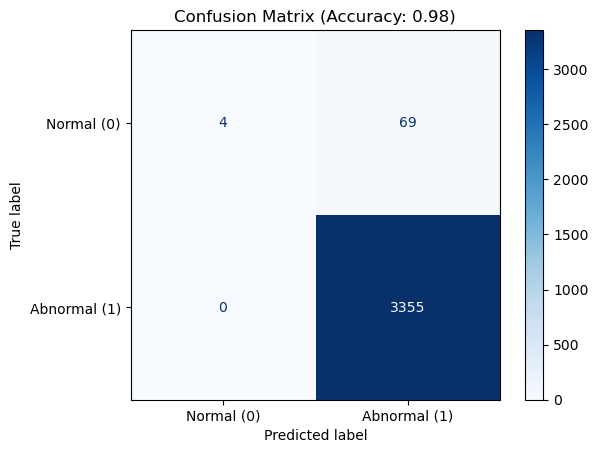

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# TODO: Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# TODO: Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# TODO: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal (0)', 'Abnormal (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred):.2f})')
plt.show()


(c)


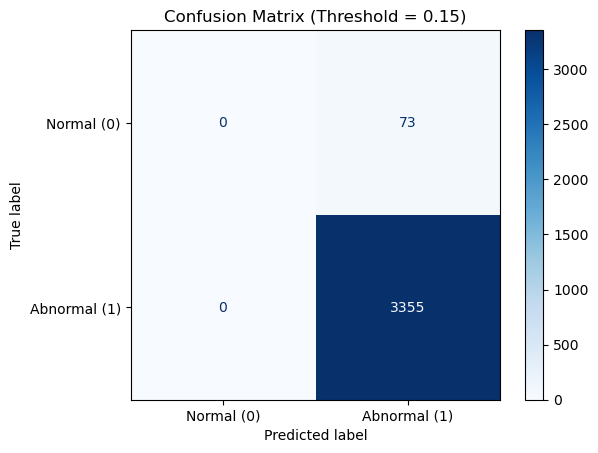

In [73]:
threshold = 0.15  # Vary the threshold as you want

#TODO: Recalculate the confusion matrix
# HINT: You can use the probability functions and threshold to obtain the new predictions from the trained model

# Get predicted probabilities for class 1
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Recalculate predictions using custom threshold
y_pred_custom = (y_prob >= threshold).astype(int)

# Recalculate confusion matrix
cm_custom = confusion_matrix(y_test, y_pred_custom)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_custom, display_labels=['Normal (0)', 'Abnormal (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()


# Q3

In [74]:
# Load dataset
data = pd.read_csv('pokemonregr.csv')

#TODO: Clean and Split dataset

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Define a function to use regularization with linear regression model
def fit_linear(regularization=None, alpha=1.0):
  #TODO: Train a linear regression model according to the specified regularization type

  return model

# Fit and obtain coefficients when using different regularization techniques with different regularization hyperparameter
reg = [None, 'L1', 'L2']

for r in reg:
  #TODO: train a model for each regularization type
  model = ...
  print(f"Coef when using {r} Regularization: {model.coef_}")
  print("------------------")

AttributeError: 'ellipsis' object has no attribute 'coef_'